# 

# Intro to Scikit-Learn

From:

* [VanderPlas, Jake. 2017. Python Data Science Handbook. O’Reilly Media, Inc.](https://github.com/jakevdp/PythonDataScienceHandbook)
* [Scikit-Learn datasets: The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

## Classification

### Data loading

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

In [1]:
import platform

import matplotlib.pyplot as plt
import numpy as np
import sklearn
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [2]:
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

print(sklearn.__version__)  # Version tested on sklearn.__version__ == 1.1.3

1.1.3


In [3]:
iris = datasets.load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
xs = iris.data[:, :2]
features = iris.feature_names[:2]

ys = iris.target

In [6]:
print(features)

['sepal length (cm)', 'sepal width (cm)']


In [7]:
xs.shape

(150, 2)

In [8]:
ys.shape

(150,)

Note: Expected shapes for features and labels (target values):

![](img/05.02-samples-features.png)

#### Random selection of training and test sets

In [9]:
x_tr,x_ts,y_tr,y_ts = train_test_split(xs,ys, test_size = 0.2, random_state = 42, shuffle=True)

<span style="color:red">Implement your solution below</span>

### Training

<span style="color:red">Implement your solution below</span>

In [10]:
# 1. Model choice (import)
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# 2. Instantiation
model=KNeighborsClassifier()

# 3. Learn (fit) the model
model= model.fit(x_tr,y_tr)

# 4. Predict on new data
results = model.predict(x_ts)

### Evaluation

[Evaluation_of_binary_classifiers](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers#Single_metrics) ([Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision))

$$\mathrm{ACC} 
= \frac{\mathrm{TP} + \mathrm{TN}}{\mathrm{P} + \mathrm {N}}
= \frac{\mathrm{TP} + \mathrm{TN}}
    {\mathrm{TP} + \mathrm{TN} + \mathrm {FP} +\mathrm {FN}}$$

<span style="color:red">Implement your solution below</span>

In [11]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_ts, results)
print(acc)

0.8


### Plot

In [12]:
HOP = 0.01  # Step size in the mesh

COLORS = ["green", "red", "blue"]

In [13]:
def plot_decision_boundary(xs, model, colors, hop):

    # Prepare the data to plot the decision boundary
    # Need to assign a color to each point in the mesh
    # [x1_min, x1_max] x [x2_min, x2_max]

    x_min, x_max = xs[:, 0].min() - 1, xs[:, 0].max() + 1
    y_min, y_max = xs[:, 1].min() - 1, xs[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, hop), np.arange(y_min, y_max, hop)
    )

    zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)
    # print(zz.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(
        xx, yy, zz, alpha=0.4, cmap=ListedColormap(colors), antialiased=True
    )

In [14]:
def plot_training_points(xs, ys, colors, features):
    for color, i, tgt_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(
            xs[ys == i, 0],
            xs[ys == i, 1],
            color=color,
            alpha=0.8,
            label=tgt_name,
            edgecolor="black",
        )
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("3-Class classification")
    plt.xlabel(features[0])
    plt.ylabel(features[1])

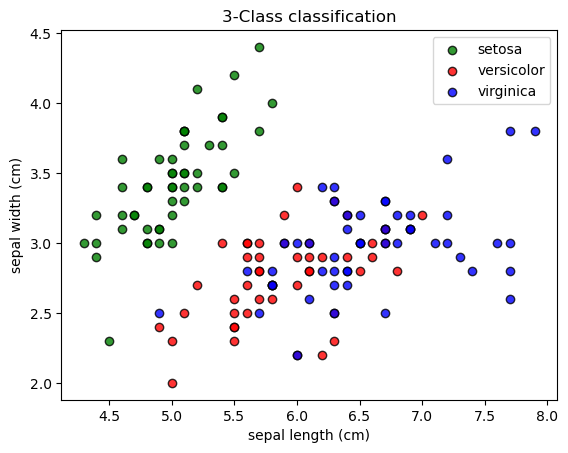

In [15]:
plot_training_points(xs, ys, COLORS, features)

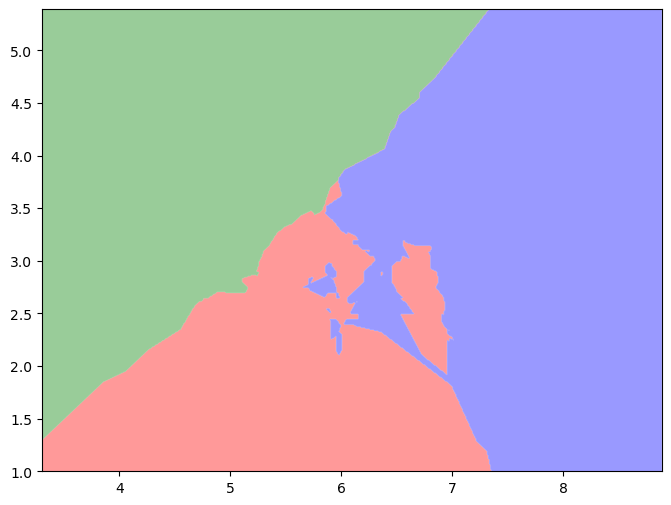

In [16]:
plot_decision_boundary(xs, model, COLORS, HOP)

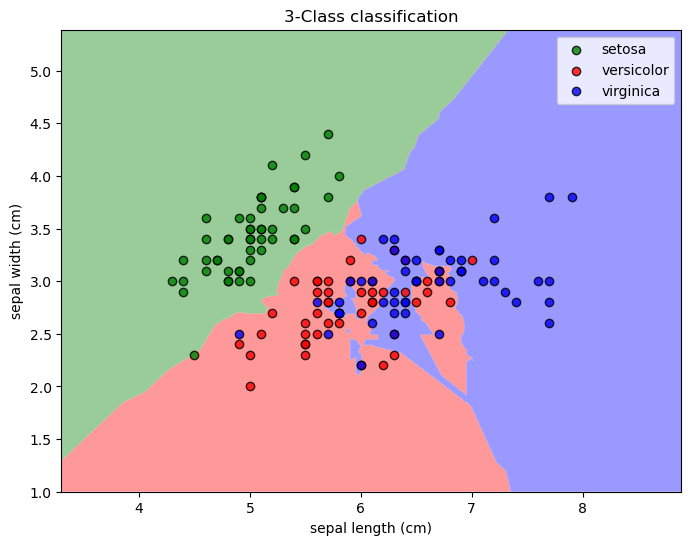

In [17]:
plot_decision_boundary(xs, model, COLORS, HOP)
plot_training_points(xs, ys, COLORS, features)

## Exercise 1

Find in the [documentation](https://scikit-learn.org/stable/supervised_learning.html) how to apply these other models to this dataset:

* *[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)*
* *[Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)*
* *[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)*
* *[k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)*
* *[Support Vector Machines (SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)*

Write the results in a table and graphically for each system using the `plot_...` [above](#Plot) functions, and give a short analysis comparing the results.

<span style="color:red">Implement your solution below</span>

                                                                    Model  \
Logistic Regression                                  LogisticRegression()   
Support Vector Machine                                              SVC()   
Random Forest           (DecisionTreeClassifier(max_features='sqrt', r...   
Decision Tree                                    DecisionTreeClassifier()   

                        Accuracy  
Logistic Regression     0.900000  
Support Vector Machine  0.900000  
Random Forest           0.766667  
Decision Tree           0.633333  


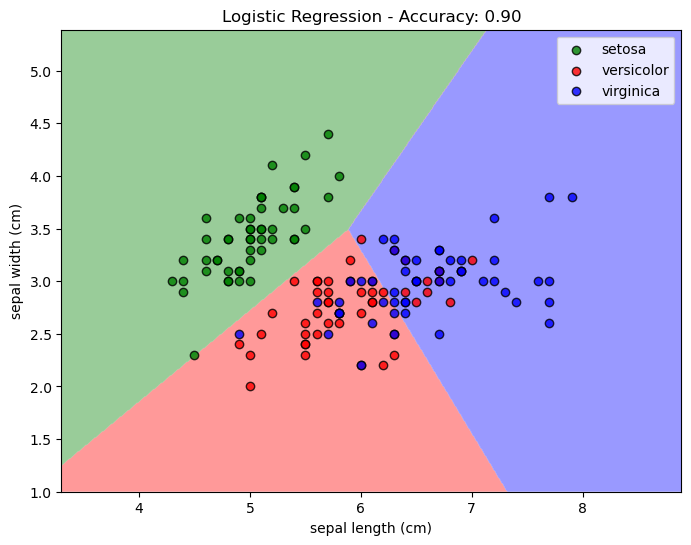

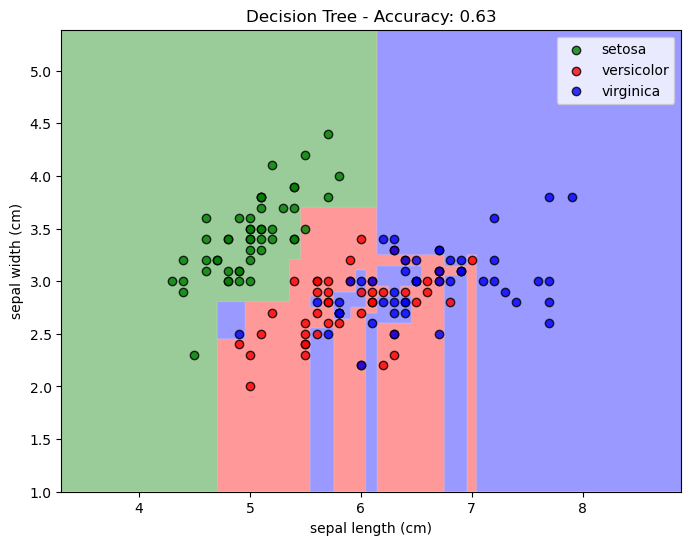

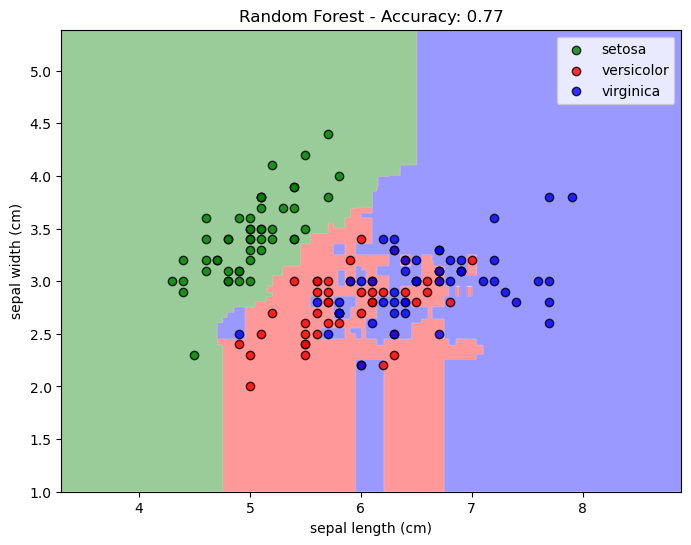

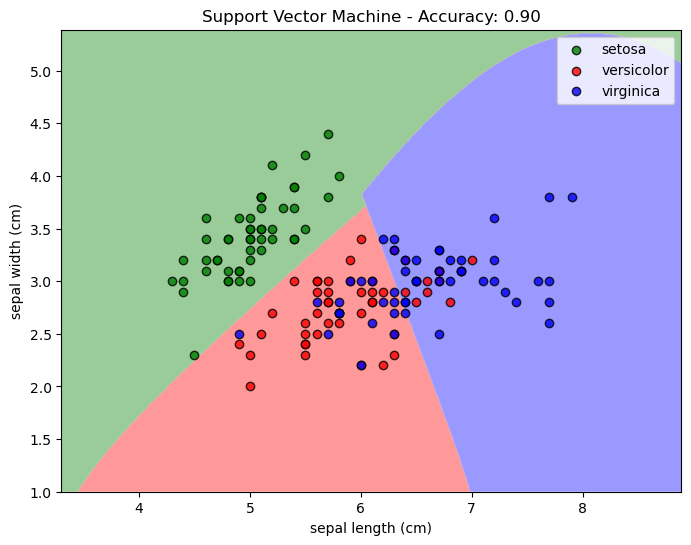

In [18]:
# Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define a dictionary to store the models and their names
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
}

# Create a dictionary to store the results
results_dict = {}

# Loop through each model and fit it to the data
for model_name, model in models.items():
    model.fit(x_tr, y_tr)
    
    # Predict on the test data
    results = model.predict(x_ts)
    
    # Calculate accuracy
    acc = accuracy_score(y_ts, results)
    
    # Store the results in the dictionary
    results_dict[model_name] = {
        "Model": model,
        "Accuracy": acc,
    }

# Display the results in a table
import pandas as pd
results_df = pd.DataFrame.from_dict(results_dict, orient='index')
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)
print(results_df)

# Plot the decision boundaries and training points for each model
for model_name, model_info in results_dict.items():
    model = model_info["Model"]
    plot_decision_boundary(xs, model, COLORS, HOP)
    plot_training_points(xs, ys, COLORS, features)
    plt.title(f'{model_name} - Accuracy: {model_info["Accuracy"]:.2f}')
    plt.show()


## Exercise 2

* Apply a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to all descriptors (there are 4) of the Iris dataset

* Give the ratio of the variance explained by each of the selected components, as well as their cumulative sum

* Apply one of the previous classifiers to the first two principal components

* Compare the quality of the predictions between those obtained with the first two principal components and those obtained with the first 2 descriptors (Exercise 1)

<span style="color:red">Implement your solution below</span>

In [19]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (descriptors)
y = iris.target  # Target variable

# Apply PCA to all descriptors
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

# Variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Print the variance explained by each component and their cumulative sum
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"Variance explained by Component {i}: {ratio:.4f}")

print(f"Cumulative Variance Explained: {cumulative_variance_ratio[-1]:.4f}")

# Split the data into training and testing sets (use the first two principal components)
X_train, X_test, y_train, y_test = train_test_split(X_pca[:, :2], y, test_size=0.2, random_state=42)

# Instantiate the classifier (e.g., Linear Regression)
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_pca = model.predict(X_test)

# Split the data into training and testing sets (use the first two descriptors)
X_train_desc, X_test_desc, _, _ = train_test_split(X[:, :2], y, test_size=0.2, random_state=42)

# Fit the model to the training data using the first two descriptors
model.fit(X_train_desc, y_train)

# Make predictions on the test data using the first two descriptors
y_pred_desc = model.predict(X_test_desc)

# Calculate and compare the Mean Squared Error (MSE) for both predictions
mse_pca = mean_squared_error(y_test, y_pred_pca)
mse_desc = mean_squared_error(y_test, y_pred_desc)

print(f"MSE with PCA: {mse_pca:.4f}")
print(f"MSE with First Two Descriptors: {mse_desc:.4f}")


Variance explained by Component 1: 0.9246
Variance explained by Component 2: 0.0531
Variance explained by Component 3: 0.0171
Variance explained by Component 4: 0.0052
Cumulative Variance Explained: 1.0000
MSE with PCA: 0.0618
MSE with First Two Descriptors: 0.1700
